**Проект: в один клик**

**Описание проекта:** 
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 


**Задача:**
Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Детализация задачи:**
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2. Нужно собрать данные по клиентам по следующим группам: Признаки, которые описывают коммуникацию сотрудников компании с клиентом. Признаки, которые описывают продуктовое поведение покупателя. Признаки, которые описывают покупательское поведение клиента. Признаки, которые описывают поведение покупателя на сайте.

3. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Загрузка библиотек**

In [1]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler, 
    OneHotEncoder, 
    OrdinalEncoder)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score


RANDOM_STATE = 42
TEST_SIZE = 0.25

In [3]:
!pip install phik

In [4]:
import phik

In [5]:
!pip install shap

In [6]:
import shap

## Загрузка данных

In [7]:
df_customer = pd.read_csv('/datasets/market_file.csv')
print(df_customer.info())
print( )
display(df_customer.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [8]:
df_money = pd.read_csv('/datasets/market_money.csv')
print(df_money.info())
print( )
display(df_money.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None



,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [9]:
df_time = pd.read_csv('/datasets/market_time.csv')
print(df_time.info())
print( )
display(df_time.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None



,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [10]:
df_money_market = pd.read_csv('/datasets/money.csv', sep=';', decimal=",")
print(df_money_market.info())
print( )
display(df_money_market.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None



,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


*Вывод по шагу №1:* данные были успешно загружены, они соотвествуют ТЗ, в типах данных ошибок нет, однако названия столбов неоднородны и нуждаются в преобразовании

## Предобработка данных

### переименование столбцов

In [11]:
df_customer.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

In [12]:
df_customer.columns = df_customer.columns.str.lower()
df_customer.rename(columns={
    'покупательская активность': 'покупательская_активность',
    'тип сервиса': 'тип_сервиса',
    'разрешить сообщать' : 'разрешить_сообщать'
}, inplace=True)
df_customer.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [13]:
df_money.columns = df_money.columns.str.lower()
df_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [14]:
df_time.columns = df_time.columns.str.lower()
df_time.columns

Index(['id', 'период', 'минут'], dtype='object')

In [15]:
df_money_market.columns = df_money_market.columns.str.lower()
df_money_market.columns

Index(['id', 'прибыль'], dtype='object')

In [16]:
def lowercase_string_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.lower()
    return df

In [17]:
lowercase_string_columns(df_customer).head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандартт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандартт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандартт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2


In [18]:
lowercase_string_columns(df_money).head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [19]:
lowercase_string_columns(df_time).head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


### проверка на пропуски

In [20]:
df_customer.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [21]:
df_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

In [22]:
df_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

In [23]:
df_money_market.isna().sum()

id         0
прибыль    0
dtype: int64

### проверка на явные дубликаты

In [24]:
df_customer.duplicated().sum()

0

In [25]:
df_money.duplicated().sum()

0

In [26]:
df_time.duplicated().sum()

0

In [27]:
df_money_market.duplicated().sum()

0

### проверка на неявные дубликаты

In [28]:
for column in df_customer.select_dtypes(include=['object']).columns:
    unique_values = df_customer.select_dtypes(include=['object'])[column].unique()
    print(f'Уникальные значения в столбце "{column}": {unique_values}')

Уникальные значения в столбце "покупательская_активность": ['снизилась' 'прежний уровень']
Уникальные значения в столбце "тип_сервиса": ['премиум' 'стандартт' 'стандарт']
Уникальные значения в столбце "разрешить_сообщать": ['да' 'нет']
Уникальные значения в столбце "популярная_категория": ['товары для детей' 'домашний текстиль' 'косметика и аксесуары'
 'техника для красоты и здоровья' 'кухонная посуда'
 'мелкая бытовая техника и электроника']


In [29]:
df_customer.loc[df_customer['тип_сервиса'] == 'стандартт', 'тип_сервиса'] = 'стандарт'

In [30]:
df_customer['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [31]:
df_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [32]:
df_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [33]:
df_time['период'] = df_time['период'].replace('дц', 'ду', regex=True)
df_time['период'].value_counts()

предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

*Вывод по шагу №2:*
1. названия столбцов были приведены к нижнему регистру
2. значений в столбцах были приведены к нижнему регистру
3. проверка на пропуски: ни в одном датафрейме нет пропусков
4. проверка на явные дубликаты: ни в одном датафрейме нет явных дубликатов
5. проверка на неявные дубликаты + ошибки: в датафрейме df_customer был одноруден 1 неявный дубликат; в датафрейме df_time обнаружена 1 орфографическая ошибка

## Исследовательский анализ данных

*1.* датафрейм df_customer


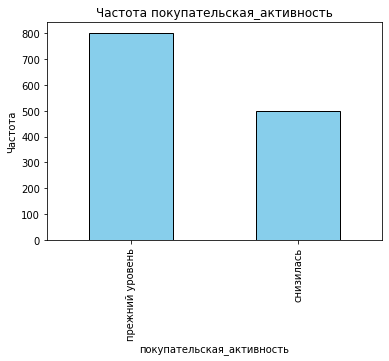

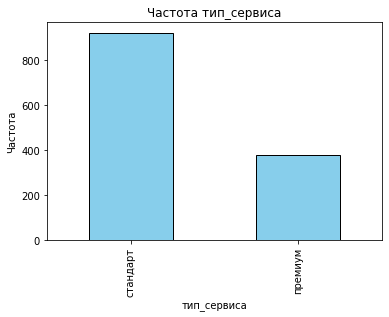

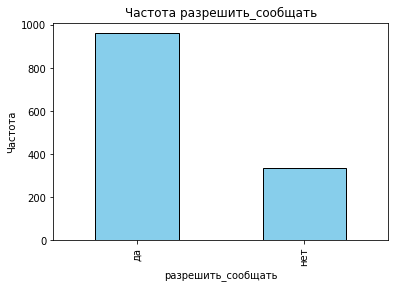

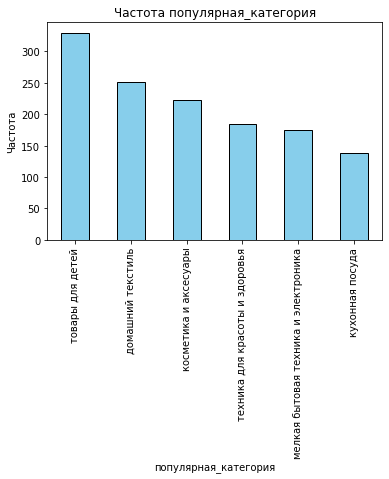

In [34]:
for col in df_customer.columns:
    if df_customer[col].dtype == 'object':
        df_customer[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Частота {col}') 
        plt.xlabel(col)
        plt.ylabel('Частота')
        plt.show()

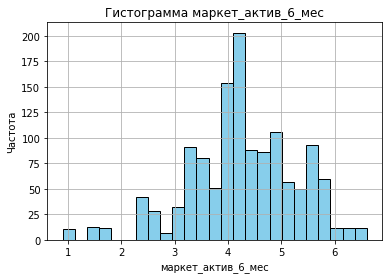

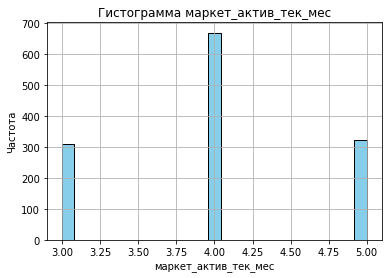

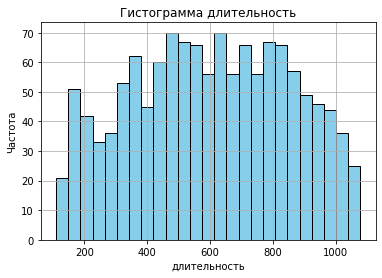

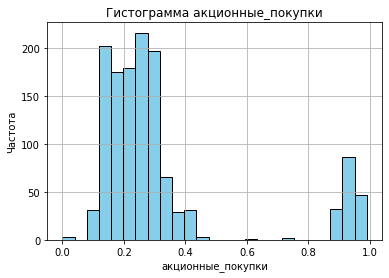

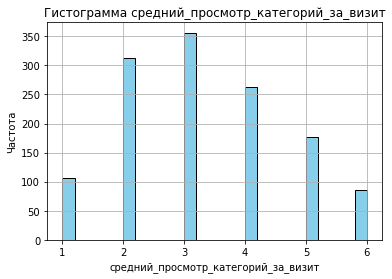

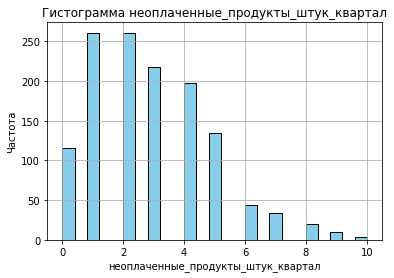

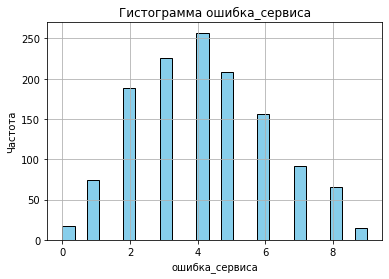

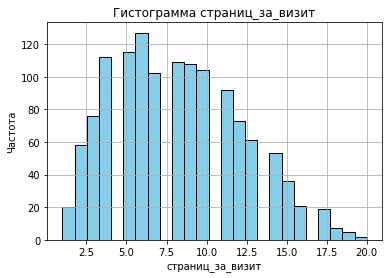

In [35]:
for col in df_customer.columns:
    if df_customer[col].dtype != 'object' and col != 'id':
        df_customer[col].hist(bins=25, color='skyblue', edgecolor='black')
        plt.title(f'Гистограмма {col}')
        plt.xlabel(col)
        plt.ylabel('Частота')
        plt.show()

*Вывод по df_customer:*
1. целевой признак - набоюдается дисбаланс
2. большинство пользователей имеют стандартный тип_сервиса
3. большая часть пользователей разрешают присылать предложения (это хорошо)
4. чаще всего покупают товары для детей
5. активность маркета за 6 мес: распределение похоже на нормальное, но скошено в сторону большего количества коммуникаций.
6. активность маркета за текущий мес: распределение дискретно
7. длительность: у магазина есть и старые, и новые покупатели, что логично
8. просмотр категорий за визит: распределение похоже на нормальное
9. неоплаченные продукты: чаще не оплачивают корзины с маленьким количеством продуктов
10. ошибка сервиса: распределение похоже на нормальное
11. страниц за визит: пользователи просматривают от 1 до 20 страниц за визит, чаще всего ~ 6

*2.* датафрейм df_money

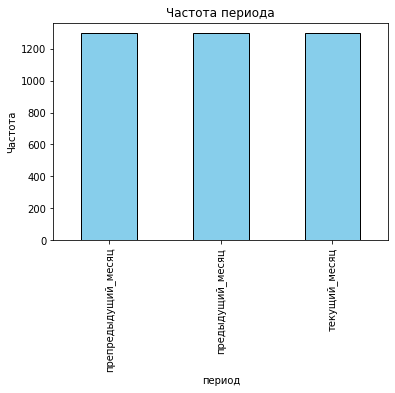

In [36]:
df_money['период'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Частота периода') 
plt.xlabel('период')
plt.ylabel('Частота')
plt.show()

Не наблюдается дисбаланса классов

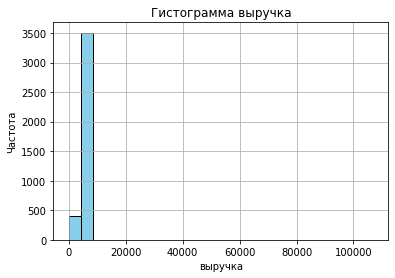

In [37]:
df_money['выручка'].hist(bins=25, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма выручка')
plt.xlabel('выручка')
plt.ylabel('Частота')
plt.show()

Наблюдается экстремальное значение

In [38]:
df_money['выручка'].max()

106862.2

Чисто теоретически, такое значение возможно, но для наших целей лучше его исключить

In [39]:
df_money = df_money.query('выручка < 20000')

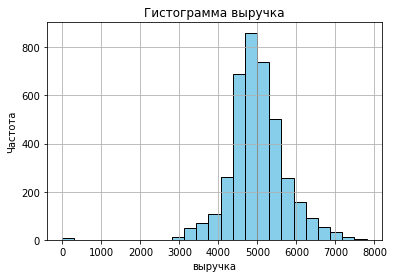

In [40]:
df_money['выручка'].hist(bins=25, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма выручка')
plt.xlabel('выручка')
plt.ylabel('Частота')
plt.show()

Теперь проверим минимальное значение

In [41]:
df_money['выручка'].min()

0.0

Такое значение тоже возможно, но для наших целей его тоже не нужно рассматривать

In [42]:
df_money = df_money.query('выручка > 0')

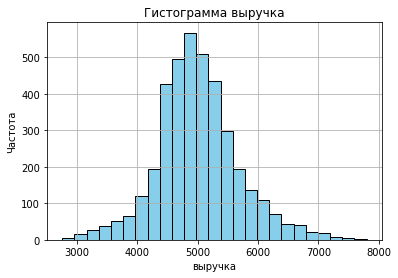

In [43]:
df_money['выручка'].hist(bins=25, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма выручка')
plt.xlabel('выручка')
plt.ylabel('Частота')
plt.show()

Теперь все прекрасно

Теперь построим еще один график

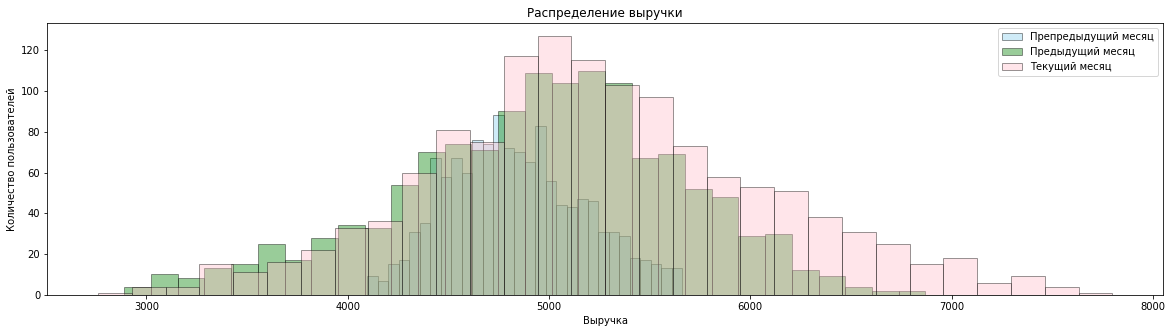

In [44]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.title('Распределение выручки')

ax.hist(df_money.query('период == "препредыдущий_месяц"')['выручка'], bins=30, alpha=0.4, label='Препредыдущий месяц', color='skyblue', edgecolor = 'black')
ax.hist(df_money.query('период == "предыдущий_месяц"')['выручка'], bins=30, alpha=0.4, label='Предыдущий месяц', color='green', edgecolor = 'black')
ax.hist(df_money.query('период == "текущий_месяц"')['выручка'], bins=30, alpha=0.4, label='Текущий месяц', color='pink', edgecolor = 'black')

ax.set_xlabel('Выручка')
ax.set_ylabel('Количество пользователей')

ax.legend()
plt.show()

С каждым месяцем график становится шире и выше - хороший знак

Вывод: были найдены экстремальные значения, которые были удалены; выручка становится больше с каждым месяцем.

*3.* датафрейм df_time

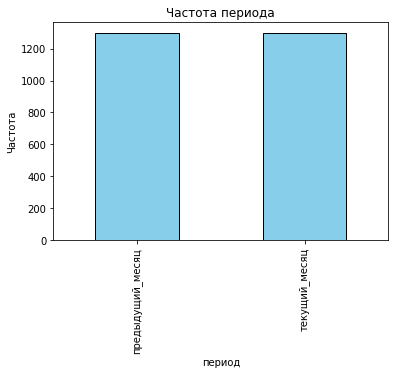

In [45]:
df_time['период'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Частота периода') 
plt.xlabel('период')
plt.ylabel('Частота')
plt.show()

Выборки сбалансированы 

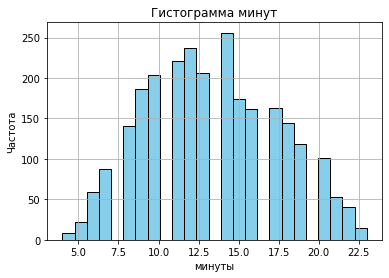

In [46]:
df_time['минут'].hist(bins=25, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма минут')
plt.xlabel('минуты')
plt.ylabel('Частота')
plt.show()

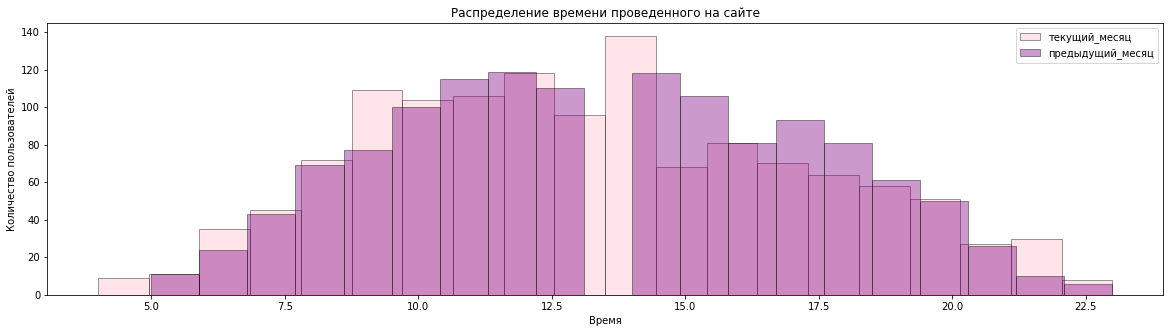

In [47]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.title('Распределение времени проведенного на сайте')
ax.hist(df_time.query('период == "текущий_месяц"')['минут'],  bins=20, alpha=0.4, label='текущий_месяц', color = 'pink', edgecolor = 'black')
ax.hist(df_time.query('период == "предыдущий_месяц"')['минут'], bins=20, alpha=0.4, label='предыдущий_месяц', color = 'purple', edgecolor = 'black')
ax.set(xlabel='Время', ylabel='Количество пользователей')
ax.legend()
plt.show()

По данным графика, пользователи стали проводить меньше времени на сайте

In [48]:
df_time.query('период == "текущий_месяц"')['минут'].mean(), df_time.query('период == "предыдущий_месяц"')['минут'].mean()

(13.204615384615385, 13.467692307692309)

Вывод: пользователи действительно начали проводить меньше времени на сайте

*4.* датафрейм df_money_market

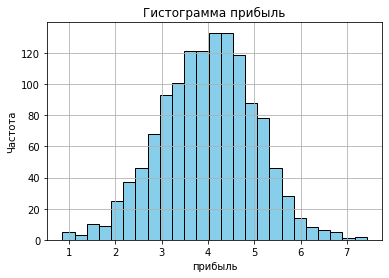

In [49]:
df_money_market['прибыль'].hist(bins=25, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма прибыль')
plt.xlabel('прибыль')
plt.ylabel('Частота')
plt.show()

Единицы измерения прибыли и выручки разные, надо это исправить

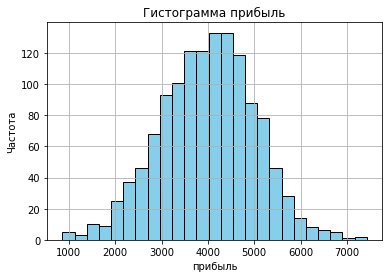

In [50]:
df_money_market['прибыль'] *= 1000

df_money_market['прибыль'].hist(bins=25, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма прибыль')
plt.xlabel('прибыль')
plt.ylabel('Частота')
plt.show()

Вывод: среднее значение прибыли 4000

*Вывод:* 

1) по df_customer

1. целевой признак - набоюдается дисбаланс
2. большинство пользователей имеют стандартный тип_сервиса
3. большая часть пользователей разрешают присылать предложения (это хорошо)
4. чаще всего покупают товары для детей
5. активность маркета за 6 мес: распределение похоже на нормальное, но скошено в сторону большего количества коммуникаций.
6. активность маркета за текущий мес: распределение дискретно
7. длительность: у магазина есть и старые, и новые покупатели, что логично
8. просмотр категорий за визит: распределение похоже на нормальное
9. неоплаченные продукты: чаще не оплачивают корзины с маленьким количеством продуктов
10. ошибка сервиса: распределение похоже на нормальное
11. страниц за визит: пользователи просматривают от 1 до 20 страниц за визит, чаще всего ~ 6

2) по df_money

1. были найдены экстремальные значения, которые были удалены
2. выручка становится больше с каждым месяцем

3) по df_time

1. пользователи действительно начали проводить меньше времени на сайте

4) по df_money_market

1. cреднее значение прибыли 4000

## Объединение таблиц

In [51]:
display(df_customer.head(3))

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5


In [52]:
display(df_time.head(3))

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10


In [53]:
display(df_money.head(3))

,id,период,выручка
1,215348,текущий_месяц,3293.1
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [54]:
table_1 = (df_money.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum').rename(columns={'предыдущий_месяц': 'выручка_пред','препредыдущий_месяц': 'выручка_препред','текущий_месяц': 'выручка_тек'}).dropna().reset_index())

table_1.head()

период,id,выручка_пред,выручка_препред,выручка_тек
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


In [55]:
table_2 = (df_time.pivot_table(index='id', columns='период', values='минут', aggfunc='sum').fillna(0).rename(columns={'предыдущий_месяц': 'минут_пред','текущий_месяц': 'минут_тек'}).reset_index())

table_2.head()

период,id,минут_пред,минут_тек
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [56]:
df = (df_customer.merge(table_1, how='inner', left_on='id', right_on='id').merge(table_2, how='inner',left_on='id',right_on='id'))

df.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_тек,минут_пред,минут_тек
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


Вывод: таблицы объединены

## Корреляционный анализ

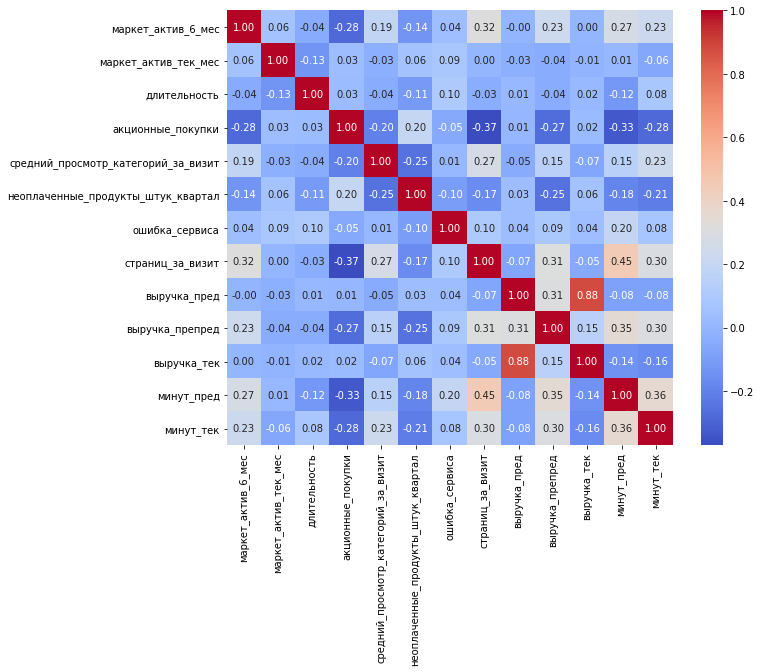

In [57]:
correlation_matrix = df.drop(columns=['id']).corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Есть мультиколлинеарность между выручкой в текущем месяце и выручкой в предыдущем месяце

Целевой признак - покупательская_активность

In [58]:
df_1 = df.copy()

df_1['покупательская_активность'] = df_1['покупательская_активность'].apply(lambda x: 0 if x == 'снизилась' else 1)

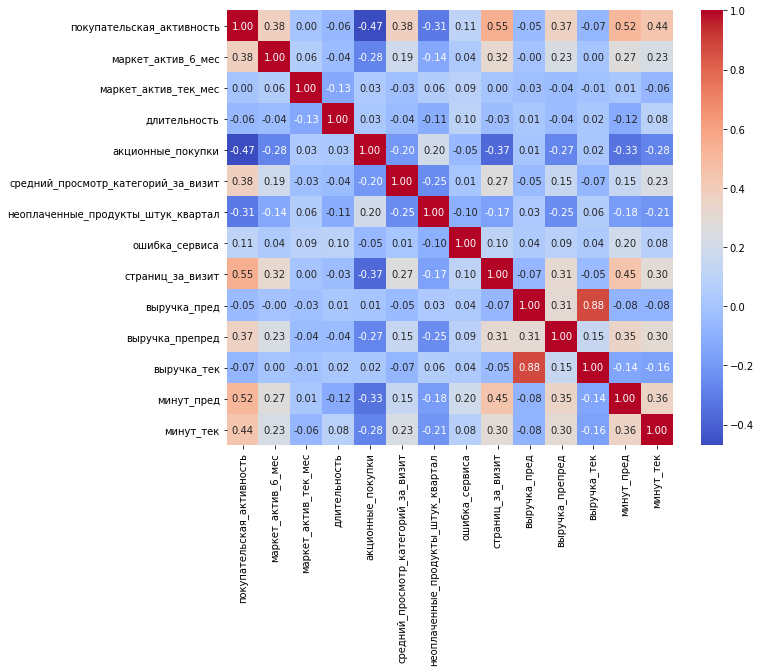

In [59]:
correlation_matrix = df_1.drop(columns=['id']).corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Также признаки "станиц_за_визит" и "минут_пред" влияют сразу на несколько признаков, попробуем их тоже исключить

*Замечание:* я не совсем уверена нужно это делать или нет, поэтому была бы рада получить какой-нибудь совет по этому поводу

In [60]:
df_corr = df.copy()

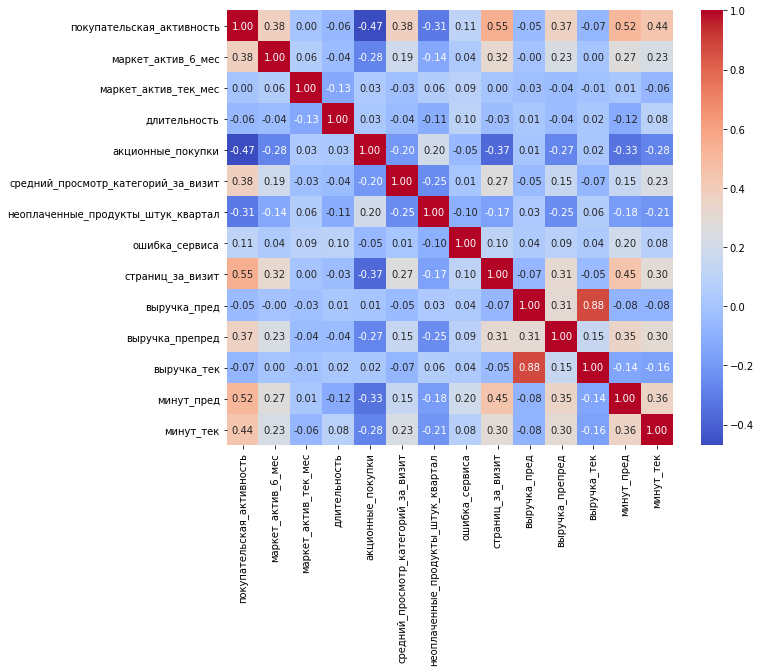

In [61]:
df_2 = df_corr.copy()

df_2['покупательская_активность'] = df_corr['покупательская_активность'].apply(lambda x: 0 if x == 'снизилась' else 1)

correlation_matrix = df_2.drop(columns=['id']).corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_пред', 'выручка_препред', 'выручка_тек', 'минут_пред', 'минут_тек']


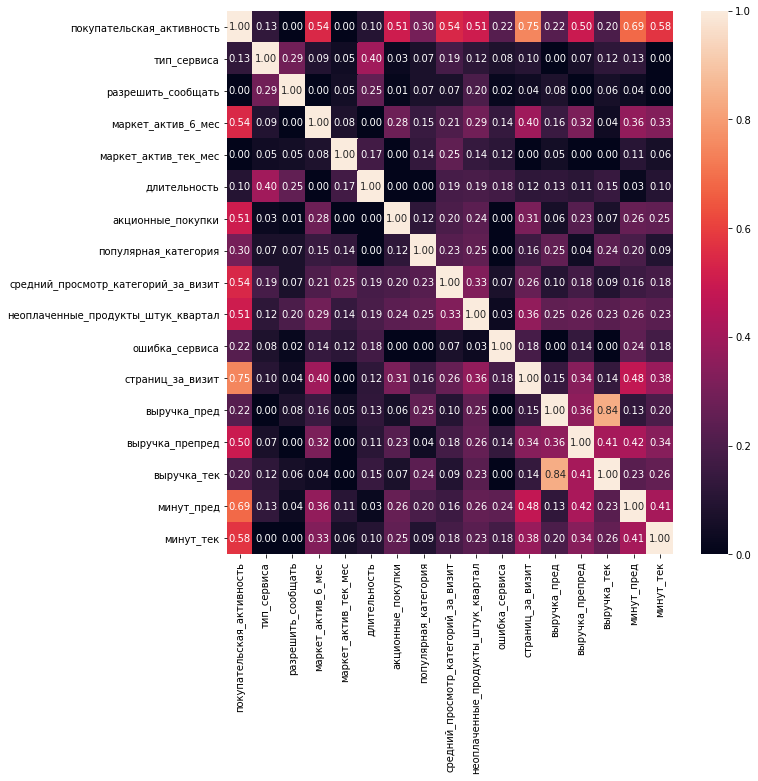

In [62]:
plt.figure(figsize=(10, 10))
phik_corr = df_corr.drop('id', axis = 1).phik_matrix()
sns.heatmap(phik_corr, annot=True, fmt='.2f')
plt.show()

Вывод: Избавились от мультиколлинеарности

## Использование пайплайнов

In [63]:
df_segment = df_corr.copy()
df_corr = df_corr.drop('id', axis = 1)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит              

In [64]:
X = df_corr.drop('покупательская_активность', axis=1)
y = df_corr['покупательская_активность']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          1296 non-null   object 
 1   разрешить_сообщать                   1296 non-null   object 
 2   маркет_актив_6_мес                   1296 non-null   float64
 3   маркет_актив_тек_мес                 1296 non-null   int64  
 4   длительность                         1296 non-null   int64  
 5   акционные_покупки                    1296 non-null   float64
 6   популярная_категория                 1296 non-null   object 
 7   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 8   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 9   ошибка_сервиса                       1296 non-null   int64  
 10  страниц_за_визит                     1296 non-null   int64  
 11  выручка_пред                  

In [67]:
ohe_columns = ['разрешить_сообщать', 'популярная_категория']

ord_columns = ['тип_сервиса']

num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'выручка_препред', 'выручка_пред','выручка_тек', 'страниц_за_визит','минут_тек']

# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore')
        )
    ]
)

# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['премиум', 'стандарт'],
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)


pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

pipe_final.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(str...
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['тип_сервиса']),
                                                 ('num', StandardScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'выручка_препред',
                                                   'выручка_пред',
                                                   'выручка_тек',
                                                   'страниц_за_визит',
                                                   'минут_тек'])])),
                ('models', DecisionTreeClassifier(random_state=42))])

*Обоснование выбора метрики:* ROC AUC не чувствительна к несбалансированным классам. А как мы смотрели по гистограммам, у нас присутствует дисбаланс классов

In [68]:
pred = pipe_final.predict_proba(X_test)
print(roc_auc_score(y_test, pred[:, 1]))

0.8004489746390002


In [69]:
pred[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [70]:
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__min_samples_split': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [0.1, 1, 10, 100],  
        'models__gamma': ['scale', 'auto'], 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=1000)],
        'models__C': [0.01, 0.1, 1, 10, 100], 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]


In [71]:
grid = GridSearchCV(pipe_final, 
                    param_distributions, 
                    cv=5, 
                    n_jobs=-1,
                    scoring='roc_auc')

In [72]:
grid.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['разрешить_сообщать',
                                                                          'популярная_категория']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simpleImputer_b...
                         {'models': [SVC(probability=True, random_state=42)],
                          'models__C': [0.1, 1, 10, 100],
                          'models__gamma': ['scale', 'auto'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [LogisticRegression(max_iter=1000,
                                                        random_state=42,
                                                        solver='liblinear')],
                          'models__C': [0.01, 0.1, 1, 10, 100],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [73]:
grid.best_score_

0.9016928126473582

In [74]:
grid.best_params_, grid.best_estimator_

({'models': SVC(probability=True, random_state=42),
  'models__C': 1,
  'models__gamma': 'auto',
  'preprocessor__num': StandardScaler()},
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('ohe',
                                                   Pipeline(steps=[('simpleImputer_ohe',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('ohe',
                                                                    OneHotEncoder(drop='first',
                                                                                  handle_unknown='ignore'))]),
                                                   ['разрешить_сообщать',
                                                    'популярная_категория']),
                                                  ('ord',
                 

In [75]:
best_model = grid.best_estimator_

y_proba = best_model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_proba[:, 1])
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc}')

Метрика ROC-AUC на тестовой выборке: 0.9049063624964607


*Вывод:*
1. был создан pipeline c кодированием (OneHotEncoder, OrdinalEncoder), маштабированием (StandartScaler, MinMaxScaler)
2. обучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC()
3. выбрали метрику roc_auc с обоснованием
4. лучшая модель: метрика roc_auc: 0.91, SVC(C=1, gamma='auto', random_state=42)

## Анализ важности признаков

In [76]:
linear_model = best_model.named_steps['models']
feature_names_prepared = best_model.named_steps['preprocessor'].get_feature_names_out()
X_train_prep = best_model.named_steps['preprocessor'].transform(X_train)
X_test_prep = best_model.named_steps['preprocessor'].transform(X_test)



explainer = shap.Explainer(linear_model.predict_proba, X_train_prep, feature_names=feature_names_prepared)
shap_values = explainer(X_test_prep)


PermutationExplainer explainer: 325it [04:29,  1.17it/s]                         


In [77]:
feature_names = shap_values.feature_names
feature_names

['ohe__разрешить_сообщать_нет',
 'ohe__популярная_категория_косметика и аксесуары',
 'ohe__популярная_категория_кухонная посуда',
 'ohe__популярная_категория_мелкая бытовая техника и электроника',
 'ohe__популярная_категория_техника для красоты и здоровья',
 'ohe__популярная_категория_товары для детей',
 'ord__тип_сервиса',
 'num__маркет_актив_6_мес',
 'num__маркет_актив_тек_мес',
 'num__длительность',
 'num__акционные_покупки',
 'num__средний_просмотр_категорий_за_визит',
 'num__неоплаченные_продукты_штук_квартал',
 'num__ошибка_сервиса',
 'num__выручка_препред',
 'num__выручка_пред',
 'num__выручка_тек',
 'num__страниц_за_визит',
 'num__минут_тек',
 'remainder__минут_пред']

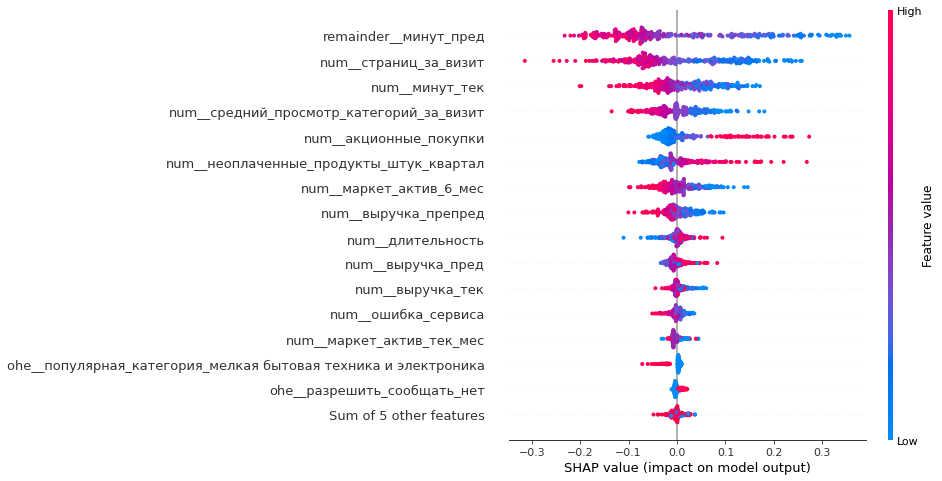

In [78]:
shap_class = shap_values[:, :, 1]
shap.plots.beeswarm(shap_class, max_display=16)

*Вывод:*
1. num__минут_тек: Похоже, что это самый значимый признак. Высокие значения отрицательно влияют на выход модели, а низкие значения положительно.
2. num__акционные_покупки: Также сильно влияет на выход модели. Чем выше значение признака, тем выше значение предсказания
3. num__маркет_актив_6_мес: Значительно влияет на предсказание, высокие значения увеличивают выход модели.

увеличение акционных предложений и работа с активными клиентами могут быть эффективными мерами для роста бизнеса.


## Сегментация покупателей

Я буду работать с вероятностями и с прибылью из df_money_market

In [81]:
df_money_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [83]:
df_full = pd.merge(df_segment, df_money_market[['id', 'прибыль']], on='id', how='inner')
df_full.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_тек,минут_пред,минут_тек,прибыль
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4160.0
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3130.0
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4870.0
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4210.0
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3950.0


In [93]:
df_full.loc[X_test.index, 'probability'] = y_proba[:, 1]

In [98]:
df_full1 = df_full.query('probability > 0.00001')
df_full1.shape

(324, 20)

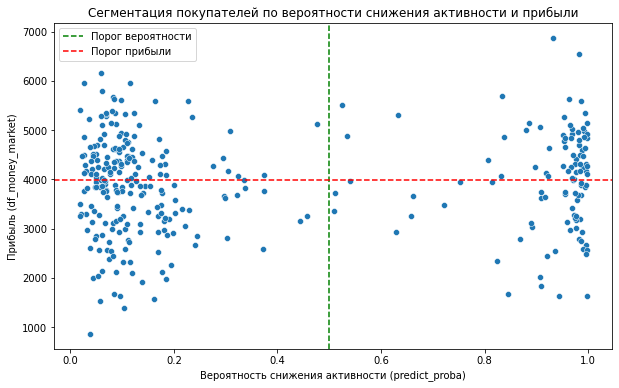

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_full1, x='probability', y='прибыль')
plt.xlabel('Вероятность снижения активности (predict_proba)')
plt.ylabel('Прибыль (df_money_market)')
plt.title('Сегментация покупателей по вероятности снижения активности и прибыли')
threshold_probability = 0.5
threshold_profit = df_full['прибыль'].mean()
plt.axvline(x=threshold_probability, linestyle='--', color='green', label='Порог вероятности')
plt.axhline(y=threshold_profit, linestyle='--', color='red', label='Порог прибыли')
plt.legend()
plt.show()

вот наш выбранный сегмент

In [103]:
users = df_full[
    (df_full['probability'] > threshold_probability) &
    (df_full['прибыль'] > threshold_profit)
]
users.shape

(57, 20)

In [106]:
others = df_full1[~df_full1['id'].isin(users['id'])]
others.shape

(267, 20)

In [109]:
print("Сегмент (users):")
display(users.describe())

Сегмент (users):


,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_тек,минут_пред,минут_тек,прибыль,probability
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,215580.385965,3.454386,3.982456,622.438596,0.503684,2.719298,3.982456,3.771930,3.877193,5045.622807,4620.982456,5341.794737,9.491228,10.087719,4764.912281,0.935893
std,181.224481,1.007307,0.640625,248.496265,0.319109,1.145712,2.133836,1.880516,1.488890,827.853168,213.552895,898.988756,2.376393,3.007614,584.120593,0.100283
min,215349.000000,0.900000,3.000000,152.000000,0.120000,1.000000,0.000000,0.000000,1.000000,2960.000000,4138.000000,3078.300000,5.000000,4.000000,4000.000000,0.524109
25%,215452.000000,2.400000,4.000000,448.000000,0.280000,2.000000,2.000000,2.000000,3.000000,4396.000000,4475.000000,4640.800000,8.000000,8.000000,4280.000000,0.931853
50%,215580.000000,3.600000,4.000000,693.000000,0.340000,3.000000,4.000000,3.000000,4.000000,5065.500000,4660.000000,5335.000000,10.000000,10.000000,4770.000000,0.969121
75%,215652.000000,4.100000,4.000000,806.000000,0.930000,3.000000,5.000000,5.000000,5.000000,5654.500000,4729.000000,6099.900000,11.000000,11.000000,5020.000000,0.988457
max,216252.000000,5.600000,5.000000,1036.000000,0.990000,6.000000,9.000000,8.000000,8.000000,6351.000000,4990.000000,7063.000000,14.000000,22.000000,6880.000000,0.997252


In [111]:
print("Остальные (others):")
display(others.describe())

Остальные (others):


,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_тек,минут_пред,минут_тек,прибыль,probability
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,216093.460674,4.378652,3.958801,584.250936,0.289401,3.460674,2.468165,4.239700,9.056180,4898.803371,4870.655431,5211.416854,14.044944,13.659176,3724.382022,0.265402
std,360.849126,0.984863,0.667581,242.967402,0.222274,1.393240,1.618130,2.002498,3.845785,676.041527,317.006595,796.741087,3.749416,4.366648,972.111053,0.319059
min,215353.000000,0.900000,3.000000,129.000000,0.110000,1.000000,0.000000,0.000000,1.000000,3155.000000,4162.000000,2952.200000,5.000000,4.000000,860.000000,0.017998
25%,215830.500000,3.900000,4.000000,401.000000,0.160000,2.000000,1.000000,3.000000,6.000000,4513.250000,4632.000000,4738.350000,12.000000,10.000000,3105.000000,0.068927
50%,216128.000000,4.300000,4.000000,582.000000,0.230000,3.000000,2.000000,4.000000,9.000000,4971.000000,4870.000000,5188.700000,14.000000,14.000000,3770.000000,0.111773
75%,216404.000000,5.100000,4.000000,782.000000,0.285000,4.500000,4.000000,6.000000,12.000000,5368.000000,5089.500000,5703.100000,17.000000,17.000000,4375.000000,0.260076
max,216646.000000,6.600000,5.000000,1061.000000,0.990000,6.000000,10.000000,9.000000,20.000000,6658.500000,5624.000000,7370.600000,22.000000,23.000000,6170.000000,0.997218


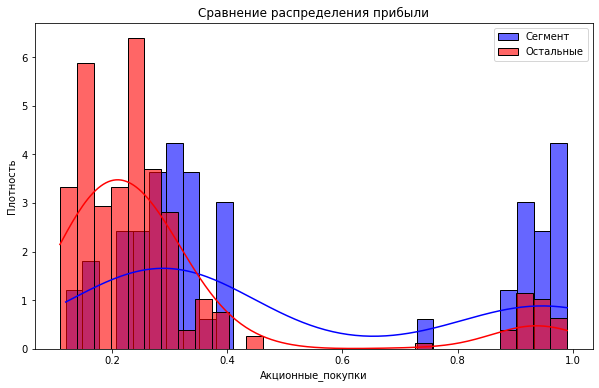

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(users['акционные_покупки'], color='blue', label='Сегмент', kde=True, stat="density", bins=30, alpha=0.6)
sns.histplot(others['акционные_покупки'], color='red', label='Остальные', kde=True, stat="density", bins=30, alpha=0.6)
plt.legend()
plt.title("Сравнение распределения прибыли")
plt.xlabel("Акционные_покупки")
plt.ylabel("Плотность")
plt.show()

Пользователи из выделенного сегмента имеют больше акционных покупок

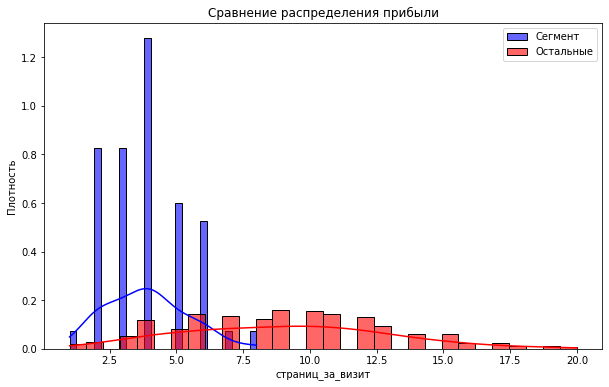

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(users['страниц_за_визит'], color='blue', label='Сегмент', kde=True, stat="density", bins=30, alpha=0.6)
sns.histplot(others['страниц_за_визит'], color='red', label='Остальные', kde=True, stat="density", bins=30, alpha=0.6)
plt.legend()
plt.title("Сравнение распределения прибыли")
plt.xlabel("страниц_за_визит")
plt.ylabel("Плотность")
plt.show()

Пользователи из выделенного сегмента имеют меньшее среднее количество страниц, которые они просмотрели за один визит на сайт, и это логично

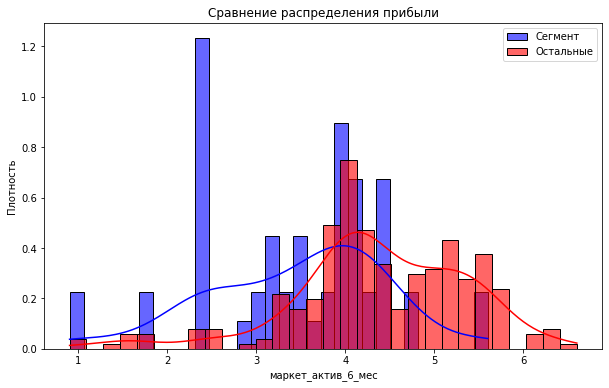

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(users['маркет_актив_6_мес'], color='blue', label='Сегмент', kde=True, stat="density", bins=30, alpha=0.6)
sns.histplot(others['маркет_актив_6_мес'], color='red', label='Остальные', kde=True, stat="density", bins=30, alpha=0.6)
plt.legend()
plt.title("Сравнение распределения прибыли")
plt.xlabel("маркет_актив_6_мес")
plt.ylabel("Плотность")
plt.show()

Пользователи из выделенного сегмента имеют меньшую активность коммуникаций со стороны магазина

Теперь хочу проверить акционные покупки у старых пользователей

In [130]:
filtered_users = users[users['длительность'] > users['длительность'].median()]
filtered_users.shape

(28, 20)

In [133]:
others_filt = users[~users['id'].isin(filtered_users['id'])]
others_filt.shape

(29, 20)

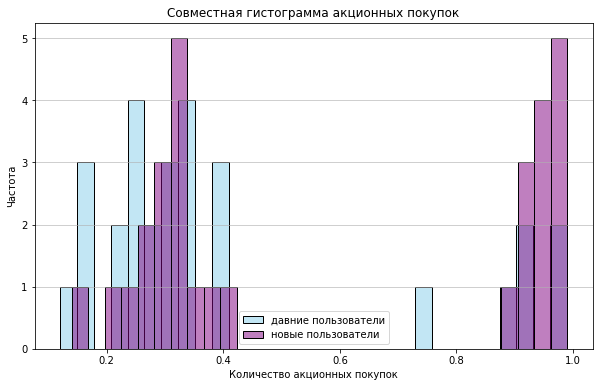

In [136]:
plt.figure(figsize=(10, 6))

sns.histplot(filtered_users['акционные_покупки'], bins=30, color='skyblue', alpha=0.5, label='давние пользователи', kde=False)

sns.histplot(others_filt['акционные_покупки'], bins=30, color='purple', alpha=0.5, label='новые пользователи', kde=False)

plt.title('Совместная гистограмма акционных покупок')
plt.xlabel('Количество акционных покупок')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()

Новых пользователей привлекают акционные товары

Возможные бизнес решения

1. ввести систему начисления баллов за покупку, что будет стимулировать пользователей тратить деньги
2. склонить пользователя приобрести подписку "премиум", благодаря которой он будет иметь возможность получения доп скидок на свои любимые категории
3. склонить пользователя к разрешению сообщений, обосновав тем, что так он сможет узнавать о скидках на свои любимые категории

**Общий вывод:**

1. Загрузка данных: загружены данные, проведена проверка на соответствие данных ТЗ
2. Предобработка данных: переименованы столбцы, проверены пропуски, удалены явные/неявные дубликаты
3. Исследовательский анализ данных: целевой признак - набоюдается дисбаланс; большинство пользователей имеют стандартный тип_сервиса; большая часть пользователей разрешают присылать предложения (это хорошо); чаще всего покупают товары для детей; активность маркета за 6 мес: распределение похоже на нормальное, но скошено в сторону большего количества коммуникаций; активность маркета за текущий мес: распределение дискретно; длительность: у магазина есть и старые, и новые покупатели, что логично; просмотр категорий за визит: распределение похоже на нормальное; неоплаченные продукты: чаще не оплачивают корзины с маленьким количеством продуктов; ошибка сервиса: распределение похоже на нормальное; страниц за визит: пользователи просматривают от 1 до 20 страниц за визит, чаще всего ~ 6 + исключены выбросы
4. Объединение таблиц: таблицы объединены
5. Корреляционный анализ: устанена мультиколлинеарность
6. Паплайн: был создан pipeline c кодированием (OneHotEncoder, OrdinalEncoder), маштабированием (StandartScaler, MinMaxScaler); обучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(); выбрали метрику roc_auc с обоснованием; лучшая модель: метрика roc_auc: 0.90009, SVC(C=1, gamma='auto', random_state=42)
7. SHAP: num__минут_тек: Похоже, что это самый значимый признак. Высокие значения отрицательно влияют на выход модели, а низкие значения положительно; num__акционные_покупки: Также сильно влияет на выход модели. Чем выше значение признака, тем выше значение предсказания; num__маркет_актив6мес: Значительно влияет на предсказание, высокие значения увеличивают выход модели.
8. Сегментация: выделили сегмент пользователей и представили возможные бизнес-решения: ввести систему начисления баллов за покупку, что будет стимулировать пользователей тратить деньги; склонить пользователя приобрести подписку "премиум", благодаря которой он будет иметь возможность получения доп скидок на свои любимые категории; склонить пользователя к разрешению сообщений, обосновав тем, что так он сможет узнавать о скидках на свои любимые категории